In [58]:
#CSC/ECE/DA 427/527
#Fall 2020

from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
import pandas as pd

def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) - d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) + d
 return ([x1,x2,y1,y2])



In [59]:
# generate cordinate of 2000 points
points = 1000
cord = moon(points,-4,10,6)
cord2 = moon(points,-4,10,6)

In [68]:
#training dataset,testing dataset
# training dataset
x1,x2,y1,y2 = cord[0],cord[1],cord[2],cord[3]
# testing dataset
x3,x4,y3,y4 = cord2[0],cord2[1],cord2[2],cord2[3]
y5 = y3 + y4
x5 = x3 + x4
tr1_data = []
tr2_data = []
test_data = []
train_data = []
label = []
# Since the data have no label, we need to assign for them.
# We aasign 1 for the first half moon and 0 for the other half
for i in range(len(x1)):
  a = [x1[i],y1[i], 0]
  tr1_data.append(a)
for i in range(len(x2)):
  b = [x2[i],y2[i], 1]
  tr2_data.append(b)
for i in range(len(x5)):
  c = [x5[i],y5[i]]
  test_data.append(c)

pre_data = np.concatenate((tr1_data,tr2_data))
np.random.shuffle(pre_data)
# Extract train_data and label from labeled data
for i in range(len(pre_data)):
    x = pre_data[i][0]
    y = pre_data[i][1]
    output = pre_data[i][2]
    train_data.append([x, y])
    label.append(output)
 
d = label
d = np.array(d)
train_data = np.array(train_data)
test_data = np.array(test_data)
# We need a array of target classes contrain 0 and 1 for Perceptron model
zeros = np.zeros(points)
ones = np.ones(int(points))
y_true = ones + zeros
y_true = np.array(y_true)


In [69]:
test_data.dtype

dtype('float64')

In [70]:
class Perceptron:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        errors = 0
        for _ in range(self.epochs):
            
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [73]:
ppt = Perceptron(lr = 0.01, epochs=50)
model = ppt.fit(train_data, d)
y_pred = ppt.predict(test_data)
y_pred = np.array(y_pred)

<Figure size 720x720 with 0 Axes>

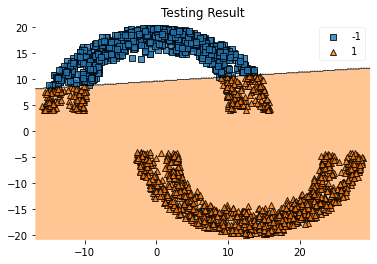

<Figure size 720x720 with 0 Axes>

In [74]:
plot_decision_regions(test_data, y_pred, clf=model)
plt.title('Testing Result')
plt.figure(figsize=(10,10))